In [80]:
import pickle
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

import PCA_functions
import Cleaning_functions
import Modeling_functions
import matplotlib.pyplot as plt


In [81]:
mailout_train_clean = PCA_functions.load_clean('mailout_train_clean')


In [82]:
mailout_train_clean.head()

,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,...,CAMEO_DEU_2015_String_Trimmer,CAMEO_DEU_2015_Successful-Songwriter,CAMEO_DEU_2015_Suddenly_family,CAMEO_DEU_2015_Tempory_Workers,CAMEO_DEU_2015_Town_Seniours,CAMEO_DEU_2015_Urban_Parents,CAMEO_DEU_2015_Wealthy_Best_Ager,CAMEO_DEU_2015_Work_Life_Balance,CAMEO_DEU_2015_Young_Mobile,CAMEO_DEU_2015_Younger_Employees
0,2.0,1.0,8.0,8.0,15.0,0.0,0.0,1.0,13.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,4.0,13.0,13.0,1.0,0.0,0.0,2.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,9.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,1.0,6.0,6.0,4.0,0.0,0.0,2.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,1.0,9.0,9.0,53.0,0.0,0.0,1.0,44.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
cluster_centers_df = pd.read_csv('data/cluster_centers_df.csv')

In [84]:
cols = list(cluster_centers_df.columns)

In [85]:
cols.remove('HH_DELTA_FLAG')
cols.remove('Unnamed: 0')
cols.append('RESPONSE')

In [86]:
mailout_train_clean = mailout_train_clean[cols]

In [ ]:
df_X, df_y, validate_set, y_validate = Modeling_functions.data_prep(mailout_train_clean, cols, 'RESPONSE')

In [ ]:
df_X.shape

In [ ]:
weights = {0:1.0, 1:1.0}

logModel = LogisticRegression(solver='liblinear', random_state = 42)
# logModel = LogisticRegression(solver='liblinear', class_weight = None, random_state = 42)

In [ ]:
logModel_result = logModel.fit(df_X, df_y)

In [ ]:
logModel_result.classes_

In [ ]:
logModel_result.score(df_X, df_y)

In [ ]:
logModel_result.score(validate_set, y_validate)

In [ ]:
cm = confusion_matrix(y_validate, logModel_result.predict(validate_set))

In [ ]:
cm_percent = cm/len(y_validate)*100
cm_percent = cm_percent.round(2)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm_percent)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_percent[i, j], ha='center', va='center', color='red')
plt.show()

data has been smoted to increase accepts 

In [ ]:
# pickle.dump(logModel_result, open('Results/LogModel_test.pkl', 'wb'))

I think the smoting over sampled - lets take it out - or have an input for how much it samples up the class imbalance

In [93]:
from sklearn.model_selection import train_test_split

I'm going to bring the function in manually for this instance to take the SMOTE out but I want to keep the rest the same. 

In [94]:
def data_prep_no_smote(df_clean, cols, response_var):
    '''
    input
    output
    '''
    # if sample_size == 'max':
    #     df_clean = df_clean
    # else:
    #     try:
    #         df_clean = df_clean.sample(sample_size, random_state = 42)
    #     except:
    #         print("The full dataset has been loaded. If this is not what you intented you may have entered an incorrect sample_size. Make sure your input is an integer and not larger than the number of rows in the dataset.")

    # might need to change this to columns to keep 
    df_clean = df_clean.astype(dtype='float64')
    ds_model = df_clean[cols]
    ds_X = ds_model.drop(response_var, axis=1)

    y0 = df_clean[response_var]
    y0 = y0.astype('int')

    # class imbalance
    # oversample = SMOTE()
    # smote_ds_X, smote_y0 = oversample.fit_resample(ds_X, y0)

    train_set, validate_set, y_train, y_validate = train_test_split(ds_X, y0, test_size=0.2, random_state=42)

    df_X = train_set
    df_y = y_train

    return df_X, df_y, validate_set, y_validate

In [95]:
df_X, df_y, validate_set, y_validate = data_prep_no_smote(mailout_train_clean, cols, 'RESPONSE')

In [111]:
logModel = LogisticRegression(solver='liblinear', class_weight='balanced', random_state = 42)
logModel_result = logModel.fit(df_X, df_y)

In [112]:
logModel_result.classes_

array([0, 1])

In [113]:
logModel_result.score(df_X, df_y)

0.6958216458416815

In [114]:
logModel_result.score(validate_set, y_validate)

0.6868716304822964

In [115]:
cm = confusion_matrix(y_validate, logModel_result.predict(validate_set))

In [116]:
cm_percent = cm/len(y_validate)*100
cm_percent = cm_percent.round(2)

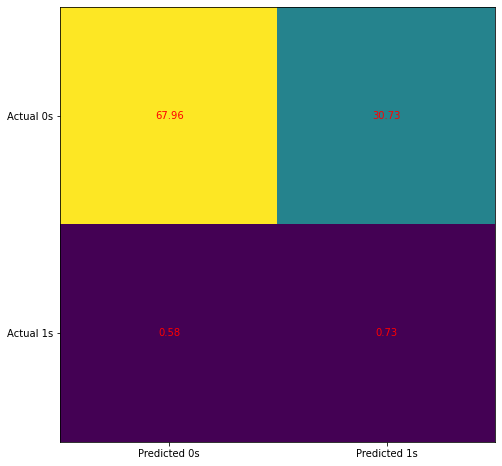

In [117]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm_percent)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_percent[i, j], ha='center', va='center', color='red')
plt.show()

over predicted 30% - might need a little bit of smoting

In [118]:
pickle.dump(logModel_result, open('Results/LogModel_test_2.pkl', 'wb'))

ok,lets smote a little - lets say by a third

In [119]:
import imblearn
from imblearn.over_sampling import SMOTE

In [120]:
def data_prep(df_clean, cols, response_var, SMOTE_value):
    '''
    input
    output
    '''
    # if sample_size == 'max':
    #     df_clean = df_clean
    # else:
    #     try:
    #         df_clean = df_clean.sample(sample_size, random_state = 42)
    #     except:
    #         print("The full dataset has been loaded. If this is not what you intented you may have entered an incorrect sample_size. Make sure your input is an integer and not larger than the number of rows in the dataset.")

    # might need to change this to columns to keep 
    df_clean = df_clean.astype(dtype='float64')
    ds_model = df_clean[cols]
    ds_X = ds_model.drop(response_var, axis=1)

    y0 = df_clean[response_var]
    y0 = y0.astype('int')

    # class imbalance
    oversample = SMOTE(sampling_strategy = SMOTE_value)
    smote_ds_X, smote_y0 = oversample.fit_resample(ds_X, y0)

    train_set, validate_set, y_train, y_validate = train_test_split(smote_ds_X, smote_y0, test_size=0.2, random_state=42)

    df_X = train_set
    df_y = y_train

    return df_X, df_y, validate_set, y_validate

In [152]:
df_X, df_y, validate_set, y_validate = data_prep(mailout_train_clean, cols, 'RESPONSE', 0.2)

In [153]:
logModel = LogisticRegression(solver='liblinear', random_state = 42)
logModel_result = logModel.fit(df_X, df_y)

In [154]:
logModel_result.score(df_X, df_y)

0.8248186401082012

In [155]:
logModel_result.score(validate_set, y_validate)

0.8206074019427025

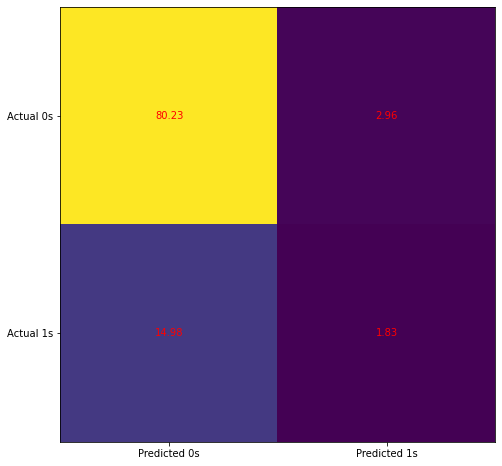

In [156]:
cm = confusion_matrix(y_validate, logModel_result.predict(validate_set))
cm_percent = cm/len(y_validate)*100
cm_percent = cm_percent.round(2)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm_percent)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_percent[i, j], ha='center', va='center', color='red')
plt.show()

smote 0.3 => array([[67.83,  7.28],
       [16.63,  8.26]])

smote 0.4 => array([[61.83,  9.43],
       [15.03, 13.71]])

smot 0.25 => array([[75.02,  4.59],
       [16.18,  4.2 ]])

smote 0.2 => array([[80.08,  3.11],
       [14.74,  2.07]])

smote 0.1 => array([[9.091e+01, 2.500e-01],
       [8.800e+00, 4.000e-02]])

In [159]:
cm_percent

array([[80.23,  2.96],
       [14.98,  1.83]])

1.83% is much closer to the expected volume of accepts so the model is balanced and should perform better. 

In [158]:
pickle.dump(logModel_result, open('Results/LogModel_test_3.pkl', 'wb'))